# Exercise on the use of LS, Lasso, Ridge and PCR regression

In this exercise we'll check the difference in the application of different regression algorithms.

The goal is to predict the association between prostate specific antigen (PSA) and several clinical measures that are potentially associated with PSA in men who were about to receive a radical prostatectomy.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('cancer_data.txt', sep='\t', index_col=0) # The entire dataset
X = np.array(data.iloc[:,:-2]) # Matrix of the features
y = np.array(data.iloc[:,-2]) # Matrix of the target

print(data)

      lcavol   lweight  age      lbph  svi       lcp  gleason  pgg45  \
1  -0.579818  2.769459   50 -1.386294    0 -1.386294        6      0   
2  -0.994252  3.319626   58 -1.386294    0 -1.386294        6      0   
3  -0.510826  2.691243   74 -1.386294    0 -1.386294        7     20   
4  -1.203973  3.282789   58 -1.386294    0 -1.386294        6      0   
5   0.751416  3.432373   62 -1.386294    0 -1.386294        6      0   
..       ...       ...  ...       ...  ...       ...      ...    ...   
93  2.830268  3.876396   68 -1.386294    1  1.321756        7     60   
94  3.821004  3.896909   44 -1.386294    1  2.169054        7     40   
95  2.907447  3.396185   52 -1.386294    1  2.463853        7     10   
96  2.882564  3.773910   68  1.558145    1  1.558145        7     80   
97  3.471966  3.974998   68  0.438255    1  2.904165        7     20   

        lpsa train  
1  -0.430783     T  
2  -0.162519     T  
3  -0.162519     T  
4  -0.162519     T  
5   0.371564     T  
..       

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# create the test and train datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scale and center the data
scalerX = StandardScaler()

X0_train = scalerX.fit_transform(X_train)

## Least-Squares regression

The objective function of a least-squares problem $ Ax = b$ is:

$x = \underset{x}{\mathrm{min}} ||Ax - b||^2_2$

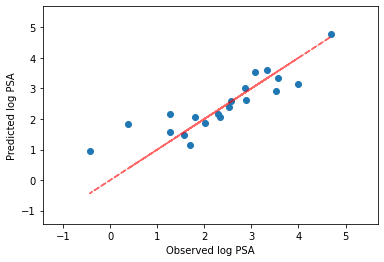

In [3]:
from sklearn.linear_model import LinearRegression

# Create the linear regression object
LS_reg = LinearRegression().fit(X0_train, y_train)

# To test the regression, we need to scale and center also the test data
X0_test = scalerX.transform(X_test)

y_pred_LS = LS_reg.predict(X0_test)

plt.scatter(y_test, y_pred_LS)
plt.plot(y_test, y_test, c='r', alpha=0.6, ls='--')
plt.xlim(y_test.min()-1, y_test.max()+1)
plt.ylim(y_test.min()-1, y_test.max()+1)
plt.xlabel('Observed log PSA')
plt.ylabel('Predicted log PSA')
plt.show()


## Lasso regression

The objective function of a least-squares problem $ Ax = b$ is:

$x = \underset{x}{\mathrm{min}} \frac{1}{2 n_s} ||Ax - b||^2_2 + \alpha ||x||_1$

In [4]:
from sklearn.linear_model import Lasso
Lasso_reg = Lasso(alpha=.1).fit(X0_train, y_train)

print('LS coefficients: ')
print(np.round(LS_reg.coef_, 3))

print('Lasso coefficients: ')
print(np.round(Lasso_reg.coef_, 3))

LS_score = LS_reg.score(X0_test, y_test)
Lasso_score = Lasso_reg.score(X0_test, y_test)

print('LS score: ' + str(np.round(LS_score,2)))
print('Lasso score: ' + str(np.round(Lasso_score,2)))

LS coefficients: 
[ 0.656  0.247 -0.16   0.104  0.328 -0.183  0.04   0.105]
Lasso coefficients: 
[ 0.554  0.18  -0.     0.     0.201  0.     0.     0.   ]
LS score: 0.76
Lasso score: 0.69


The penalty on the L1 norm is used to promote the sparsity of the regression weights.

To infer the correct value of $\alpha$ to apply we can use the cross-validation.

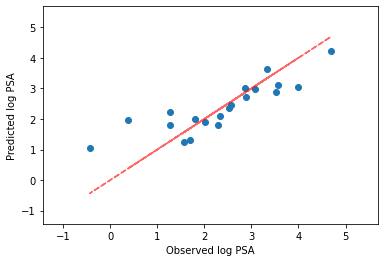

LS coefficients: 
[ 0.656  0.247 -0.16   0.104  0.328 -0.183  0.04   0.105]
LassoCV coefficients: 
[ 0.565  0.192 -0.     0.014  0.219  0.     0.     0.002]
LassoCV score: 0.7
LassoCV alpha: 0.076


In [5]:
from sklearn.linear_model import LassoCV

LassoCV_reg = LassoCV(cv=5, random_state=42).fit(X0_train, y_train)

y_pred_LassoCV = LassoCV_reg.predict(X0_test)

plt.scatter(y_test, y_pred_LassoCV)
plt.plot(y_test, y_test, c='r', alpha=0.6, ls='--')
plt.xlim(y_test.min()-1, y_test.max()+1)
plt.ylim(y_test.min()-1, y_test.max()+1)
plt.xlabel('Observed log PSA')
plt.ylabel('Predicted log PSA')
plt.show()

print('LS coefficients: ')
print(np.round(LS_reg.coef_, 3))

print('LassoCV coefficients: ')
print(np.round(LassoCV_reg.coef_, 3))

LassoCV_score = LassoCV_reg.score(X0_test, y_test)

print('LassoCV score: ' + str(np.round(LassoCV_score,2)))
print('LassoCV alpha: ' + str(np.round(LassoCV_reg.alpha_,4)))

## Ridge regression

The objective function of a least-squares problem $ Ax = b$ is:

$x = \underset{x}{\mathrm{min}} ||Ax - b||^2_2 + \alpha ||x||^2_2$

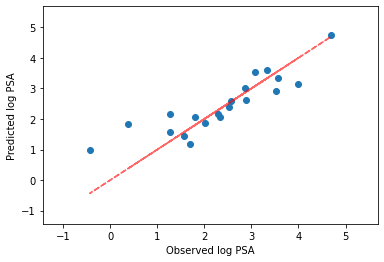

LS coefficients: 
[ 0.656  0.247 -0.16   0.104  0.328 -0.183  0.04   0.105]
RidgeCV coefficients: 
[ 0.641  0.246 -0.154  0.102  0.321 -0.163  0.04   0.099]
RidgeCV score: 0.76
RidgeCV alpha: 1.0


In [6]:
from sklearn.linear_model import RidgeCV

RidgeCV_reg = RidgeCV(alphas=(0.1, 0.5, 1, 5, 10, 50), cv=5).fit(X0_train, y_train)

y_pred_RidgeCV = RidgeCV_reg.predict(X0_test)

plt.scatter(y_test, y_pred_RidgeCV)
plt.plot(y_test, y_test, c='r', alpha=0.6, ls='--')
plt.xlim(y_test.min()-1, y_test.max()+1)
plt.ylim(y_test.min()-1, y_test.max()+1)
plt.xlabel('Observed log PSA')
plt.ylabel('Predicted log PSA')
plt.show()

print('LS coefficients: ')
print(np.round(LS_reg.coef_, 3))

print('RidgeCV coefficients: ')
print(np.round(RidgeCV_reg.coef_, 3))

RidgeCV_score = RidgeCV_reg.score(X0_test, y_test)

print('RidgeCV score: ' + str(np.round(RidgeCV_score,2)))
print('RidgeCV alpha: ' + str(np.round(RidgeCV_reg.alpha_,4)))

## Principal components regression

The principal component regression is the same as the LS regression, with an extra-step: the PCA is applyied to the X matrix, and the linear regression is performed on the new projected data.

[42.89 20.32 10.77  8.    5.93  5.24  3.87  2.98]


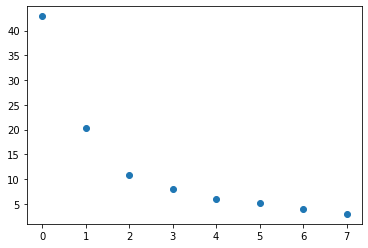

In [7]:
from sklearn.decomposition import PCA

pca = PCA().fit(X0_train)

print(np.round(pca.explained_variance_ratio_*100, 2))

plt.scatter(np.arange(X.shape[1]), pca.explained_variance_ratio_*100)
plt.show()

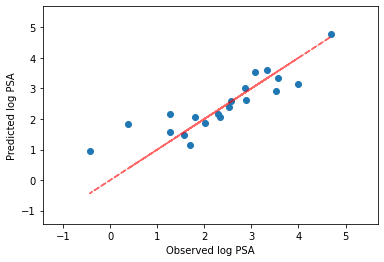

LS coefficients: 
[ 0.656  0.247 -0.16   0.104  0.328 -0.183  0.04   0.105]
PCR coefficients: 
[ 0.398  0.009 -0.44   0.058  0.286  0.004  0.079 -0.487]
LS score: 0.76
PCR score: 0.76


In [8]:
A0_train = pca.components_.T
Z0_train = X0_train @ A0_train
Z0_test = X0_test @ A0_train

# The regressio has to be applied to the PC scores
PCR_reg = LinearRegression().fit(Z0_train, y_train)

y_pred_PCR = PCR_reg.predict(Z0_test)

plt.scatter(y_test, y_pred_PCR)
plt.plot(y_test, y_test, c='r', alpha=0.6, ls='--')
plt.xlim(y_test.min()-1, y_test.max()+1)
plt.ylim(y_test.min()-1, y_test.max()+1)
plt.xlabel('Observed log PSA')
plt.ylabel('Predicted log PSA')
plt.show()

print('LS coefficients: ')
print(np.round(LS_reg.coef_, 3))

print('PCR coefficients: ')
print(np.round(PCR_reg.coef_, 3))

PCR_score = PCR_reg.score(Z0_test, y_test)

print('LS score: ' + str(np.round(LS_score,2)))
print('PCR score: ' + str(np.round(PCR_score,2)))

This added step has two benefits:

* The features become uncorrelated between them.
* The dimensionality of the feature matrix can be reduced.

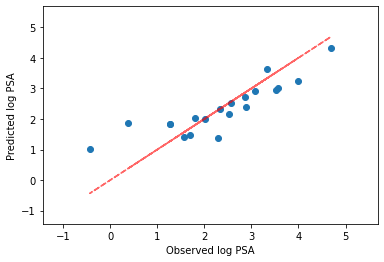

LS score: 0.76
PCR score: 0.73


In [9]:
# We can test the regression with fewer features
q = 3
Z0_train = X0_train @ A0_train[:,:q]
Z0_test = X0_test @ A0_train[:,:q]

PCR_reg = LinearRegression().fit(Z0_train, y_train)

y_pred_PCR = PCR_reg.predict(Z0_test)

plt.scatter(y_test, y_pred_PCR)
plt.plot(y_test, y_test, c='r', alpha=0.6, ls='--')
plt.xlim(y_test.min()-1, y_test.max()+1)
plt.ylim(y_test.min()-1, y_test.max()+1)
plt.xlabel('Observed log PSA')
plt.ylabel('Predicted log PSA')
plt.show()

PCR_score = PCR_reg.score(Z0_test, y_test)

print('LS score: ' + str(np.round(LS_score,2)))
print('PCR score: ' + str(np.round(PCR_score,2)))